# _ ECE WATERLOO ASSIGNMENT _

In [1]:
# Import libaries
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15,18]
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

_ Read modified csv file _

In [2]:
df = pd.read_csv('Data.csv')

In [3]:
#df = df[df.t != 0]

In [4]:
df.head()

,t,x,y,x_out,y_out
0,0,0.54378,0.20457,0.00000,0.00000
1,1,0.54378,0.20457,0.54378,0.20457
2,2,0.54378,0.20457,1.08760,0.31114
3,3,0.54378,0.20457,1.63140,0.31971
4,4,0.54378,0.20457,2.17510,0.23028


In [5]:
#Split the input and output from dataframe
xy_output = df[['x_out','y_out']].values
df = df.drop(['x_out','y_out'],1)
X = df.values

_ Features Transformation _

In [6]:
poly = PolynomialFeatures(5)
X =poly.fit_transform(X)

In [7]:
print X[0]
print len(X[0])

[  1.00000000e+00   0.00000000e+00   5.43780000e-01   2.04570000e-01
   0.00000000e+00   0.00000000e+00   0.00000000e+00   2.95696688e-01
   1.11241075e-01   4.18488849e-02   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.60793945e-01   6.04906715e-02   2.27565866e-02   8.56102638e-03
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   8.74365315e-02   3.28936174e-02
   1.23745767e-02   4.65531493e-03   1.75132917e-03   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   4.75462371e-02   1.78868913e-02
   6.72904731e-03   2.53146715e-03   9.52337775e-04   3.58269408e-04]
56


Split data for training and test 

In [8]:
X_train, X_test, xy_pos_train, xy_pos_test = train_test_split(X, xy_output, test_size = 0.2, random_state = 5 )

# _ Apply Ridge Regression as our model_

In [9]:
Ridge_model_x = RidgeCV(alphas=(0.0001,0.001,0.01,0.1, 1.0, 10.0,100),cv = 5)
Ridge_model_x.fit(X_train,xy_pos_train[:,0])

RidgeCV(alphas=(0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100), cv=5,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [10]:
Ridge_model_y = RidgeCV(alphas=(0.0001,0.001,0.01,0.1, 1.0, 10.0,100),cv = 5)
Ridge_model_y.fit(X_train,xy_pos_train[:,1])

RidgeCV(alphas=(0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100), cv=5,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [11]:
print 'Coefficient for x with Ridge Regression:', Ridge_model_x.coef_
print 'Coefficient for y with Ridge Regression:', Ridge_model_y.coef_

Coefficient for x with Ridge Regression: [  0.00000000e+00   1.11649424e-04   2.85309461e-03   1.38408254e-03
  -6.00337620e-07   9.99463711e-01  -3.71706758e-04  -8.68703226e-03
  -5.65074635e-03  -3.14820397e-03   2.99229614e-07   2.17139571e-06
  -1.01968491e-05   7.78622024e-04   1.18540956e-03   4.93612376e-04
   1.13625990e-02   8.85640846e-03   4.84462711e-03   4.23041756e-03
   2.03667068e-08  -1.61039276e-07  -1.13777423e-06   3.67404133e-07
  -2.17684860e-07   2.36710467e-05  -5.86893926e-04  -6.12422471e-04
  -1.09096145e-03  -3.01415847e-04  -6.02963330e-03  -6.17720527e-03
  -5.72875689e-03  -5.16870864e-04  -3.00758017e-03  -3.13506590e-11
  -5.51194913e-09  -9.66787114e-09   3.27764395e-08   2.84027681e-07
   5.08760197e-07  -5.47266816e-07   1.15723852e-07  -3.18913762e-06
  -9.60972122e-06   1.85193558e-04   5.23918517e-05   2.97600284e-04
   3.04862671e-04   6.85324389e-05   7.31000690e-04   3.36553464e-03
  -1.47300158e-03   3.01802963e-03  -7.21597518e-04   7.909063

In [12]:
i = Ridge_model_x.predict(X_train)
o = Ridge_model_x.predict(X_test)
print 'Root Mean Square Error for In-Sample of x with Ridge Regression :', np.sqrt(mean_squared_error(xy_pos_train[:,0], i))
print 'Root Mean Square Error for Out-Sample of x with Ridge Regression : ', np.sqrt(mean_squared_error(xy_pos_test[:,0], o))

Root Mean Square Error for In-Sample of x with Ridge Regression : 0.000171886573689
Root Mean Square Error for Out-Sample of x with Ridge Regression :  0.000205785048629


In [13]:
i = Ridge_model_y.predict(X_train)
o = Ridge_model_y.predict(X_test)
print 'Root Mean Square Error for In-Sample of y with Ridge Regression ', np.sqrt(mean_squared_error(xy_pos_train[:,1], i))
print 'Root Mean Square Error for Out-Sample of y with Ridge Regression: ', np.sqrt(mean_squared_error(xy_pos_test[:,1], o))

Root Mean Square Error for In-Sample of y with Ridge Regression  0.000220800189564
Root Mean Square Error for Out-Sample of y with Ridge Regression:  0.000229847921395


# _Apply Lasso Regression as our model_#

In [14]:
Lasso_model_x = LassoCV(alphas=[0.000001,0.00001, 0.0001,0.001,0.01,0.1, 1.0, 10.0,100],cv = 5)
Lasso_model_x.fit(X_train,xy_pos_train[:,0])

C:\Users\buu\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100],
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [15]:
Lasso_model_y = LassoCV(alphas=[0.000001,0.00001, 0.0001,0.001,0.01,0.1, 1.0, 10.0,100],cv = 5)
Lasso_model_y.fit(X_train,xy_pos_train[:,1])

LassoCV(alphas=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100],
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [16]:
print 'Coefficient for x with Lasso Regression:', Lasso_model_x.coef_
print 'Coefficient for y with Lasso Regression:', Lasso_model_y.coef_

Coefficient for x with Lasso Regression: [  0.00000000e+00   4.40400570e-02   3.68162323e-01  -5.82790746e-02
   2.80485026e-03   8.33664404e-01  -8.61595254e-02  -1.35890014e-01
   4.16890246e-01   1.54491967e-01  -1.24930016e-04   3.06089748e-03
   5.30327327e-04   9.44135281e-02   6.80007277e-02   2.11969960e-02
  -1.75013094e-01  -3.01270156e-01  -3.35639197e-01   2.16177894e-02
  -1.02294719e-06  -6.45556829e-05   2.49857687e-05  -1.58163478e-03
   3.03295299e-04   8.33699955e-05   1.24057485e-02   9.30393858e-04
   1.93411703e-02   1.68501968e-03   1.13862579e-01  -4.64052570e-02
  -8.14445091e-02  -5.65509962e-02  -1.20961232e-02   4.51112317e-08
   3.68681935e-06  -4.95216222e-07   7.75042077e-05  -7.16360135e-05
   4.66840256e-06  -6.31473568e-04  -8.23440041e-04  -7.04111977e-04
  -7.52075475e-06  -1.21706407e-02  -4.19057690e-03  -1.37008064e-02
   1.98578213e-03  -1.69907452e-03  -1.51284258e-02   5.44816974e-02
   1.16102780e-01   6.76735059e-02   2.30643973e-02  -9.344586

In [17]:
i = Lasso_model_x.predict(X_train)
o = Lasso_model_x.predict(X_test)
print 'Root Mean Square Error for In-Sample of x with Lasso Regression :', np.sqrt(mean_squared_error(xy_pos_train[:,0], i))
print 'Root Mean Square Error for Out-Sample of x with Lasso Regression : ', np.sqrt(mean_squared_error(xy_pos_test[:,0], o))

Root Mean Square Error for In-Sample of x with Lasso Regression : 0.034528113511
Root Mean Square Error for Out-Sample of x with Lasso Regression :  0.0359269655257


In [18]:
i = Lasso_model_y.predict(X_train)
o = Lasso_model_y.predict(X_test)
print 'Root Mean Square Error for In-Sample of y with Lasso Regression :', np.sqrt(mean_squared_error(xy_pos_train[:,1], i))
print 'Root Mean Square Error for Out-Sample of y with Lasso Regression : ', np.sqrt(mean_squared_error(xy_pos_test[:,1], o))

Root Mean Square Error for In-Sample of y with Lasso Regression : 0.103937173862
Root Mean Square Error for Out-Sample of y with Lasso Regression :  0.106847758518


# _Predict the trajectory of a projectile launched at 45 degrees with an initial velocity of 10 m/s till it hits the ground or timeindex=100 whichever is earlier_

In [19]:
#Read the formatted output file
predict_df = pd.read_csv('out_45_10.csv')
predict_df.head()

,t,x,y
0,1,0.707107,0.658107
1,2,0.707107,0.658107
2,3,0.707107,0.658107
3,4,0.707107,0.658107
4,5,0.707107,0.658107


In [20]:
#Read the prepared ground truth
ground_truth = pd.read_csv('Ground_truth.csv')
X_truth = ground_truth['x'].values
Y_truth = ground_truth['y'].values
Y_truth_stop = Y_truth[Y_truth>=0]
X_truth_stop = X_truth[0:len(Y_truth_stop)]
ground_truth.head()


,x,y
0,0.70711,0.65811
1,1.41420,1.21820
2,2.12130,1.68030
3,2.82840,2.04440
4,3.53550,2.31050


In [21]:
X_input = poly.fit_transform(predict_df.values)

Apply the model to the data set

In [22]:
#This block output the trajectories of the projectile based on Ridge Regression Model
x_output_Ridge = Ridge_model_x.predict(X_input)
y_output_Ridge = Ridge_model_y.predict(X_input)
y_output_Ridge_stop = y_output_Ridge[y_output_Ridge>=0]
x_output_Ridge_stop = x_output_Ridge[0:len(y_output_Ridge_stop)]
print x_output_Ridge_stop
print y_output_Ridge_stop

[ 0.70705756  1.41417593  2.12129384  2.82841072  3.53552623  4.24264025
  4.94975289  5.65686448  6.36397557  7.07108692  7.77819949  8.48531445
  9.19243319  9.89955726]
[ 0.65808214  1.2181982   1.68031187  2.04442323  2.31053235  2.4786393
  2.54874422  2.52084733  2.39494897  2.17104965  1.84915007  1.42925117
  0.91135415  0.29546053]


In [23]:
#This block output the trajectories of the projectile based on Lasso Regression model
x_output_Lasso = Lasso_model_x.predict(X_input)
y_output_Lasso = Lasso_model_y.predict(X_input)
_less_than_0= np.argmax(y_output_Lasso < 0)
print _less_than_0
y_output_Lasso_stop = y_output_Lasso[0:_less_than_0]
x_output_Lasso_stop = x_output_Lasso[0:_less_than_0]
print x_output_Lasso_stop
print y_output_Lasso_stop

14
[ 0.75235945  1.43238271  2.118702    2.81053021  3.5071267   4.20780263
  4.91192647  5.61892933  6.32831042  7.03964246  7.75257707  8.4668502
  9.18228757  9.89881001]
[ 0.67804798  1.18248996  1.61203483  1.9625538   2.23004917  2.41067813
  2.50077641  2.49688207  2.39575921  2.19442167  1.8901568   1.48054919
  0.96350437  0.33727254]


# _Plot the trajectories of the 2 models and the ground truth (based on Physics) _

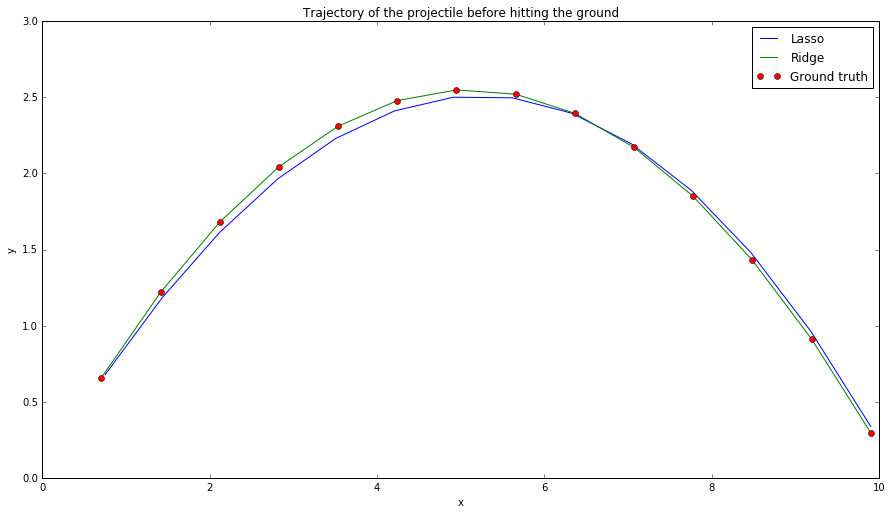

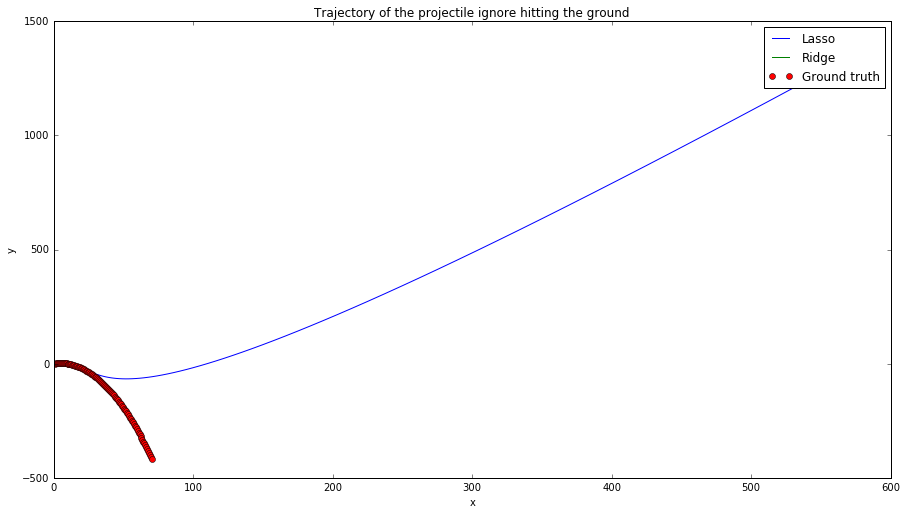

In [24]:
plt.subplot(2, 1, 1)
a0= plt.plot(x_output_Lasso_stop, y_output_Lasso_stop, label = 'Lasso')
a1= plt.plot(x_output_Ridge_stop, y_output_Ridge_stop, label = 'Ridge')
a2= plt.plot(X_truth_stop , Y_truth_stop,'o', label = 'Ground truth')
plt.legend()
plt.title('Trajectory of the projectile before hitting the ground')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.subplot(2, 1, 2)
a0= plt.plot(x_output_Lasso, y_output_Lasso, label = 'Lasso')
a1 = plt.plot(x_output_Ridge, y_output_Ridge, label = 'Ridge')
a2 = plt.plot(X_truth , Y_truth,'o', label = 'Ground truth')
plt.legend()
plt.title('Trajectory of the projectile ignore hitting the ground')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.show()

# _Output csv file for submission (Ridge Regression only)_#

In [25]:
predict_df['x_out'] = x_output_Ridge
predict_df['y_out'] = y_output_Ridge
tem_df = pd.DataFrame([[0,0,0,0,0]], columns=predict_df.columns)

In [26]:
tem_df = tem_df.append(predict_df,ignore_index=True)
out_df = tem_df[tem_df['y_out'] >= 0]

In [27]:
out_df = out_df[['t','x_out','y_out']]
out_df.columns = ['[time_collect]', '[x]', '[y]']

In [28]:
out_df

,[time_collect],[x],[y]
0,0,0.000000,0.000000
1,1,0.707058,0.658082
2,2,1.414176,1.218198
3,3,2.121294,1.680312
4,4,2.828411,2.044423
5,5,3.535526,2.310532
6,6,4.242640,2.478639
7,7,4.949753,2.548744
8,8,5.656864,2.520847
9,9,6.363976,2.394949


In [29]:
out_df.to_csv('submission.csv', index= False)